# Downloading data
Go to the [Kaggle download page](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption?resource=download)

## Import the data and libraries & Set Up 

In [59]:
import pandas as pd

In [60]:
# Read the data from the pjme-data dataset
energy_df = pd.read_csv('pjme-data/PJME_hourly.csv')

# For joining purposes
energy_df.set_index('Datetime', inplace=True) 

# We need same type when joining (other dataset wil have datetime)
energy_df.index = pd.to_datetime(energy_df.index)

# Display the first few rows of the dataframe
energy_df.head(-10)

# nyc_temp_df.head(num) - helps specify how many rows of the dataframe you want to see

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 10:00:00,39884.0
2018-01-01 11:00:00,39544.0
2018-01-01 12:00:00,39270.0


In [61]:
nyc_temp_df = pd.read_csv('nyc-temp.csv')

# Convert 'DATE' column to datetime, assuming the year is 2010
nyc_temp_df['DATE'] = pd.to_datetime('2010-' + nyc_temp_df['DATE'].str[:5] + nyc_temp_df['DATE'].str[5:], format='%Y-%m-%dT%H:%M:%S')

# Set the 'DATE' column as the index
nyc_temp_df.set_index('DATE', inplace=True)

# Display the first few rows to verify
print(nyc_temp_df.head())

                         STATION  LATITUDE  LONGITUDE  ELEVATION  \
DATE                                                               
2010-01-01 01:00:00  USW00093815   39.9064   -84.2185      305.7   
2010-01-01 02:00:00  USW00093815   39.9064   -84.2185      305.7   
2010-01-01 03:00:00  USW00093815   39.9064   -84.2185      305.7   
2010-01-01 04:00:00  USW00093815   39.9064   -84.2185      305.7   
2010-01-01 05:00:00  USW00093815   39.9064   -84.2185      305.7   

                     HLY-CLDH-NORMAL HLY-CLDH-NORMAL_ATTRIBUTES  \
DATE                                                              
2010-01-01 01:00:00              0.0                          C   
2010-01-01 02:00:00              0.0                          C   
2010-01-01 03:00:00              0.0                          C   
2010-01-01 04:00:00              0.0                          C   
2010-01-01 05:00:00              0.0                          C   

                     HLY-CLOD-PCTBKN HLY-CLOD-PCTBKN_

In [62]:
energy_temp_df = energy_df.join(nyc_temp_df, how='inner')
energy_temp_df.head()

,PJME_MW,STATION,LATITUDE,LONGITUDE,ELEVATION,HLY-CLDH-NORMAL,HLY-CLDH-NORMAL_ATTRIBUTES,HLY-CLOD-PCTBKN,HLY-CLOD-PCTBKN_ATTRIBUTES,HLY-CLOD-PCTCLR,...,HLY-WIND-2NDPCT,HLY-WIND-2NDPCT_ATTRIBUTES,HLY-WIND-AVGSPD,HLY-WIND-AVGSPD_ATTRIBUTES,HLY-WIND-PCTCLM,HLY-WIND-PCTCLM_ATTRIBUTES,HLY-WIND-VCTDIR,HLY-WIND-VCTDIR_ATTRIBUTES,HLY-WIND-VCTSPD,HLY-WIND-VCTSPD_ATTRIBUTES
Datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00,30075.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,59,C,215,...,210,C,10.3,C,44,C,243,C,4.8,C
2010-01-01 02:00:00,28907.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,60,C,225,...,216,C,10.3,C,51,C,241,C,4.8,C
2010-01-01 03:00:00,27906.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,76,C,228,...,205,C,10.2,C,47,C,242,C,4.6,C
2010-01-01 04:00:00,27373.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,50,C,226,...,201,C,10.2,C,49,C,241,C,4.6,C
2010-01-01 05:00:00,27411.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,71,C,224,...,201,C,10.2,C,42,C,241,C,4.7,C


# Visualizing the data

<Axes: xlabel='Datetime'>

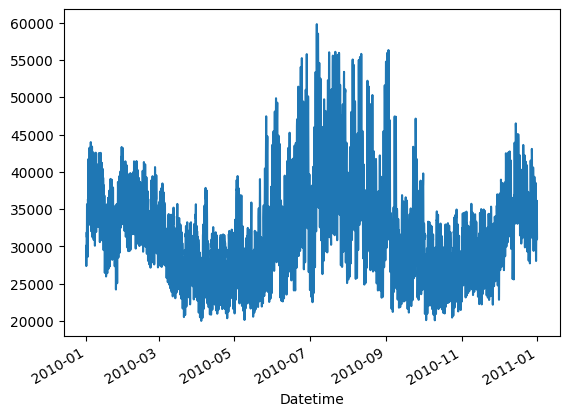

In [65]:
energy_temp_df['PJME_MW'].plot()

# By Month
energy_temp_df.resample('M').mean()['PJME_MW'].plot()

# By day
energy_temp_df.resample('D').mean()['PJME_MW'].plot()